In [137]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from statsmodels.distributions.empirical_distribution import ECDF


In [138]:
train = pd.read_csv("rossman_train.csv", 
                    parse_dates = True, low_memory = False, index_col = 'Date')

store = pd.read_csv("rossman_store.csv", 
                    low_memory = False)
train.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=1017209, freq=None)

Exploratory Data Analysis

In [139]:
print("In total: ", train.shape)
train.head(5)

In total:  (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [141]:
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.isocalendar().week

train['SalePerCustomer'] = train['Sales']/train['Customers']
train['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64


--> Trung bình, 1 khách hàng đã đóng góp vào doanh thu là $9.5 Mặc dù có những ngày doanh thu lại bằng 0 --> tập data đang có lỗi

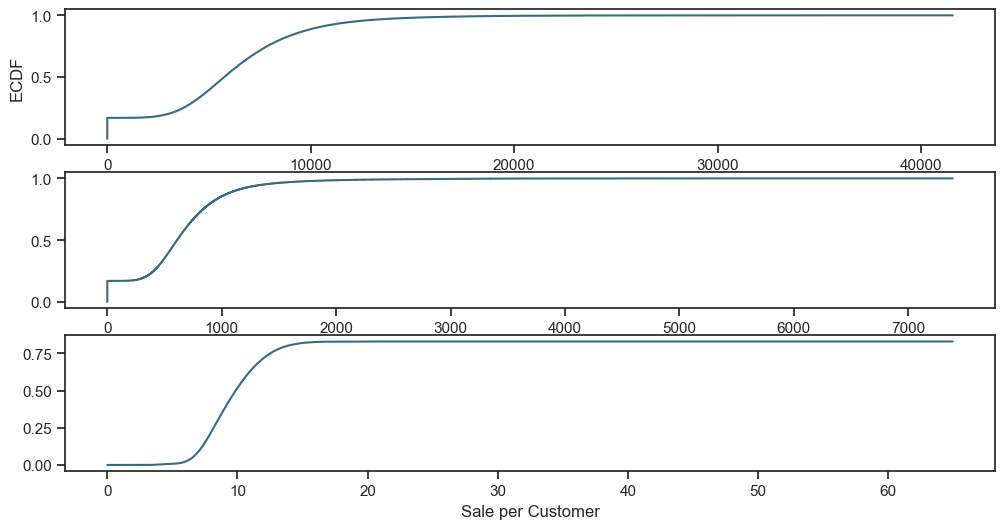

In [142]:
#Sử dụng ECDF: empirical cumulative distribution function¶ để biểu diễn tìm ra lỗi

sns.set(style = "ticks")
c = '#386B7F' 
plt.figure(figsize = (12, 6))

plt.subplot(311)
cdf = ECDF(train['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sales'); plt.ylabel('ECDF');

 
plt.subplot(312)
cdf = ECDF(train['Customers'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Customers');

plt.subplot(313)
cdf = ECDF(train['SalePerCustomer'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sale per Customer');

In [143]:
train[(train.Open == 0) & (train.Sales == 0)].head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-07-31,292,5,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-31,876,5,0,0,0,1,0,1,2015,7,31,31,NaN
2015-07-30,292,4,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-30,876,4,0,0,0,1,0,1,2015,7,30,31,NaN
2015-07-29,292,3,0,0,0,1,0,1,2015,7,29,31,NaN


In [144]:
len(train[(train.Open == 0) & (train.Sales == 0)])

172817

In [145]:
zero_sales = train[(train.Open != 0) & (train.Sales == 0)]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (54, 13)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-05-15,971,5,0,0,1,0,0,1,2015,5,15,20,NaN
2015-03-26,674,4,0,0,1,0,0,0,2015,3,26,13,NaN
2015-02-05,699,4,0,0,1,1,0,0,2015,2,5,6,NaN
2014-10-01,708,3,0,0,1,1,0,0,2014,10,1,40,NaN
2014-09-22,357,1,0,0,1,0,0,0,2014,9,22,39,NaN


In [146]:
len(train[(train.Open != 0) & (train.Sales == 0)])

54

In [147]:
print("Closed stores and days which didn't have any sales won't be counted into the forecasts.")
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]

print("In total: ", train.shape)

Closed stores and days which didn't have any sales won't be counted into the forecasts.
In total:  (844338, 13)


loại bỏ ra

about store information

In [148]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [149]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [150]:
# missing values?
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [151]:
# missing values in CompetitionDistance
store[pd.isnull(store.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [152]:
# fill NaN with a median value (skewed distribuion)
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

In [153]:
# no promo = no information about the promo?
_ = store[pd.isnull(store.Promo2SinceWeek)]
_[_.Promo2 != 0].shape

(0, 10)

In [154]:
# replace NA's by 0
store.fillna(0, inplace = True)

In [155]:
print("Joining train set with an additional store information.")

train_store = pd.merge(train, store, how = 'inner', on = 'Store')

print("In total: ", train_store.shape)
train_store.head()

Joining train set with an additional store information.
In total:  (844338, 22)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020,546,1,1,0,1,2015,7,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782,523,1,1,0,1,2015,7,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011,560,1,1,0,1,2015,7,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102,612,1,1,0,1,2015,7,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [156]:
train_store.groupby('StoreType')['Sales'].describe()


,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


In [157]:
train_store.groupby('StoreType')[['Customers', 'Sales']].sum()

,Customers,Sales
StoreType,,
a,363541431,3165334859
b,31465616,159231395
c,92129705,783221426
d,156904995,1765392943


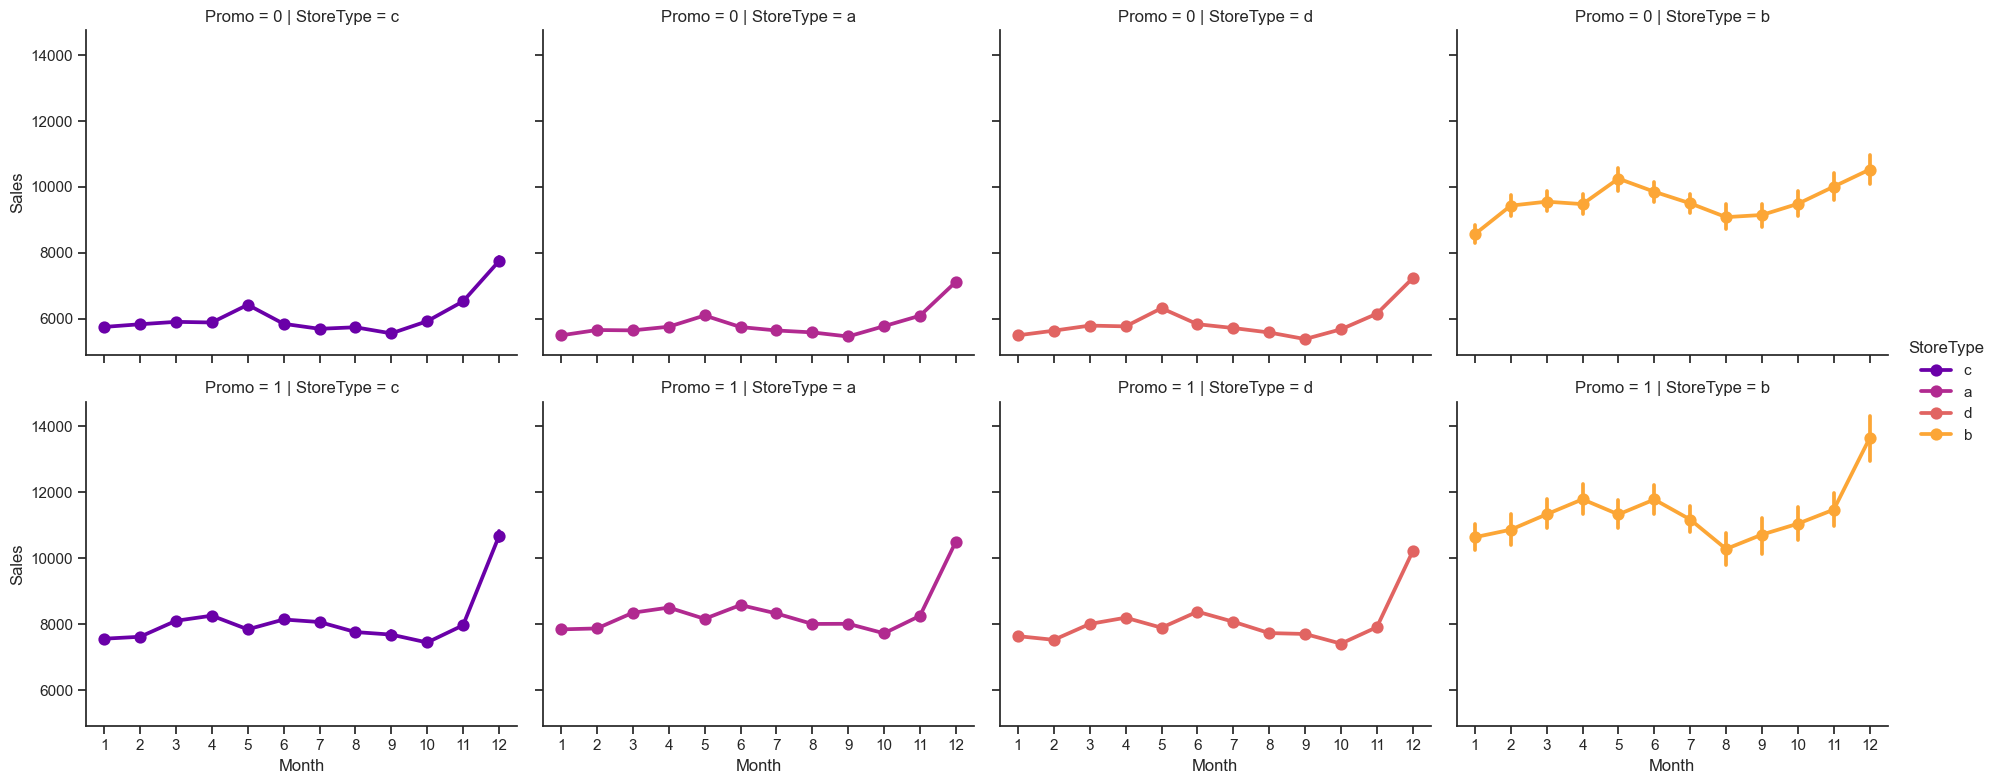

In [158]:
# sales trends
sns.catplot(data=train_store, x='Month', y='Sales', 
            col='StoreType', 
            palette='plasma',
            hue='StoreType',
            row='Promo', 
            kind='point', 
            height=4, 
            aspect=1.2,  
            )

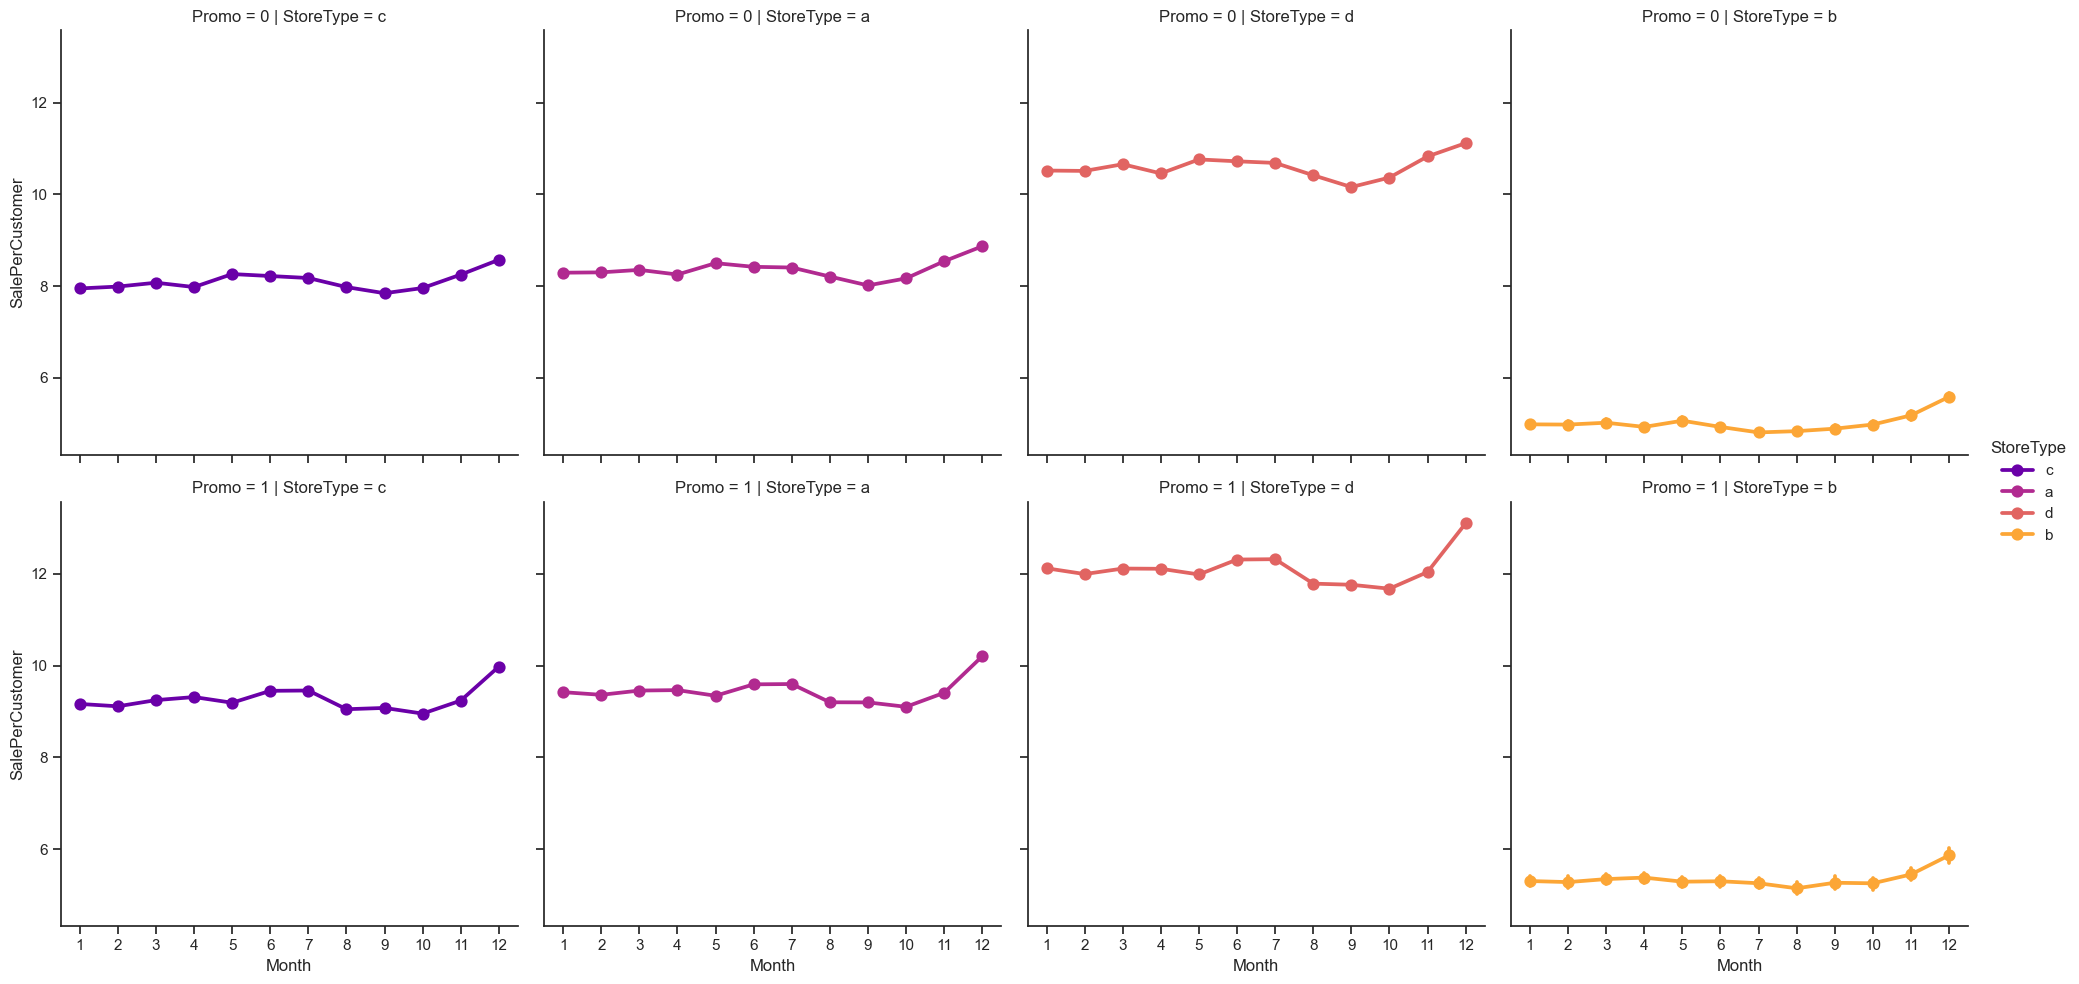

In [159]:
# sale per customer trends
sns.catplot(data = train_store, x = 'Month', y = "SalePerCustomer", 
               col = 'StoreType', 
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo',
               color = c,
            kind='point') 

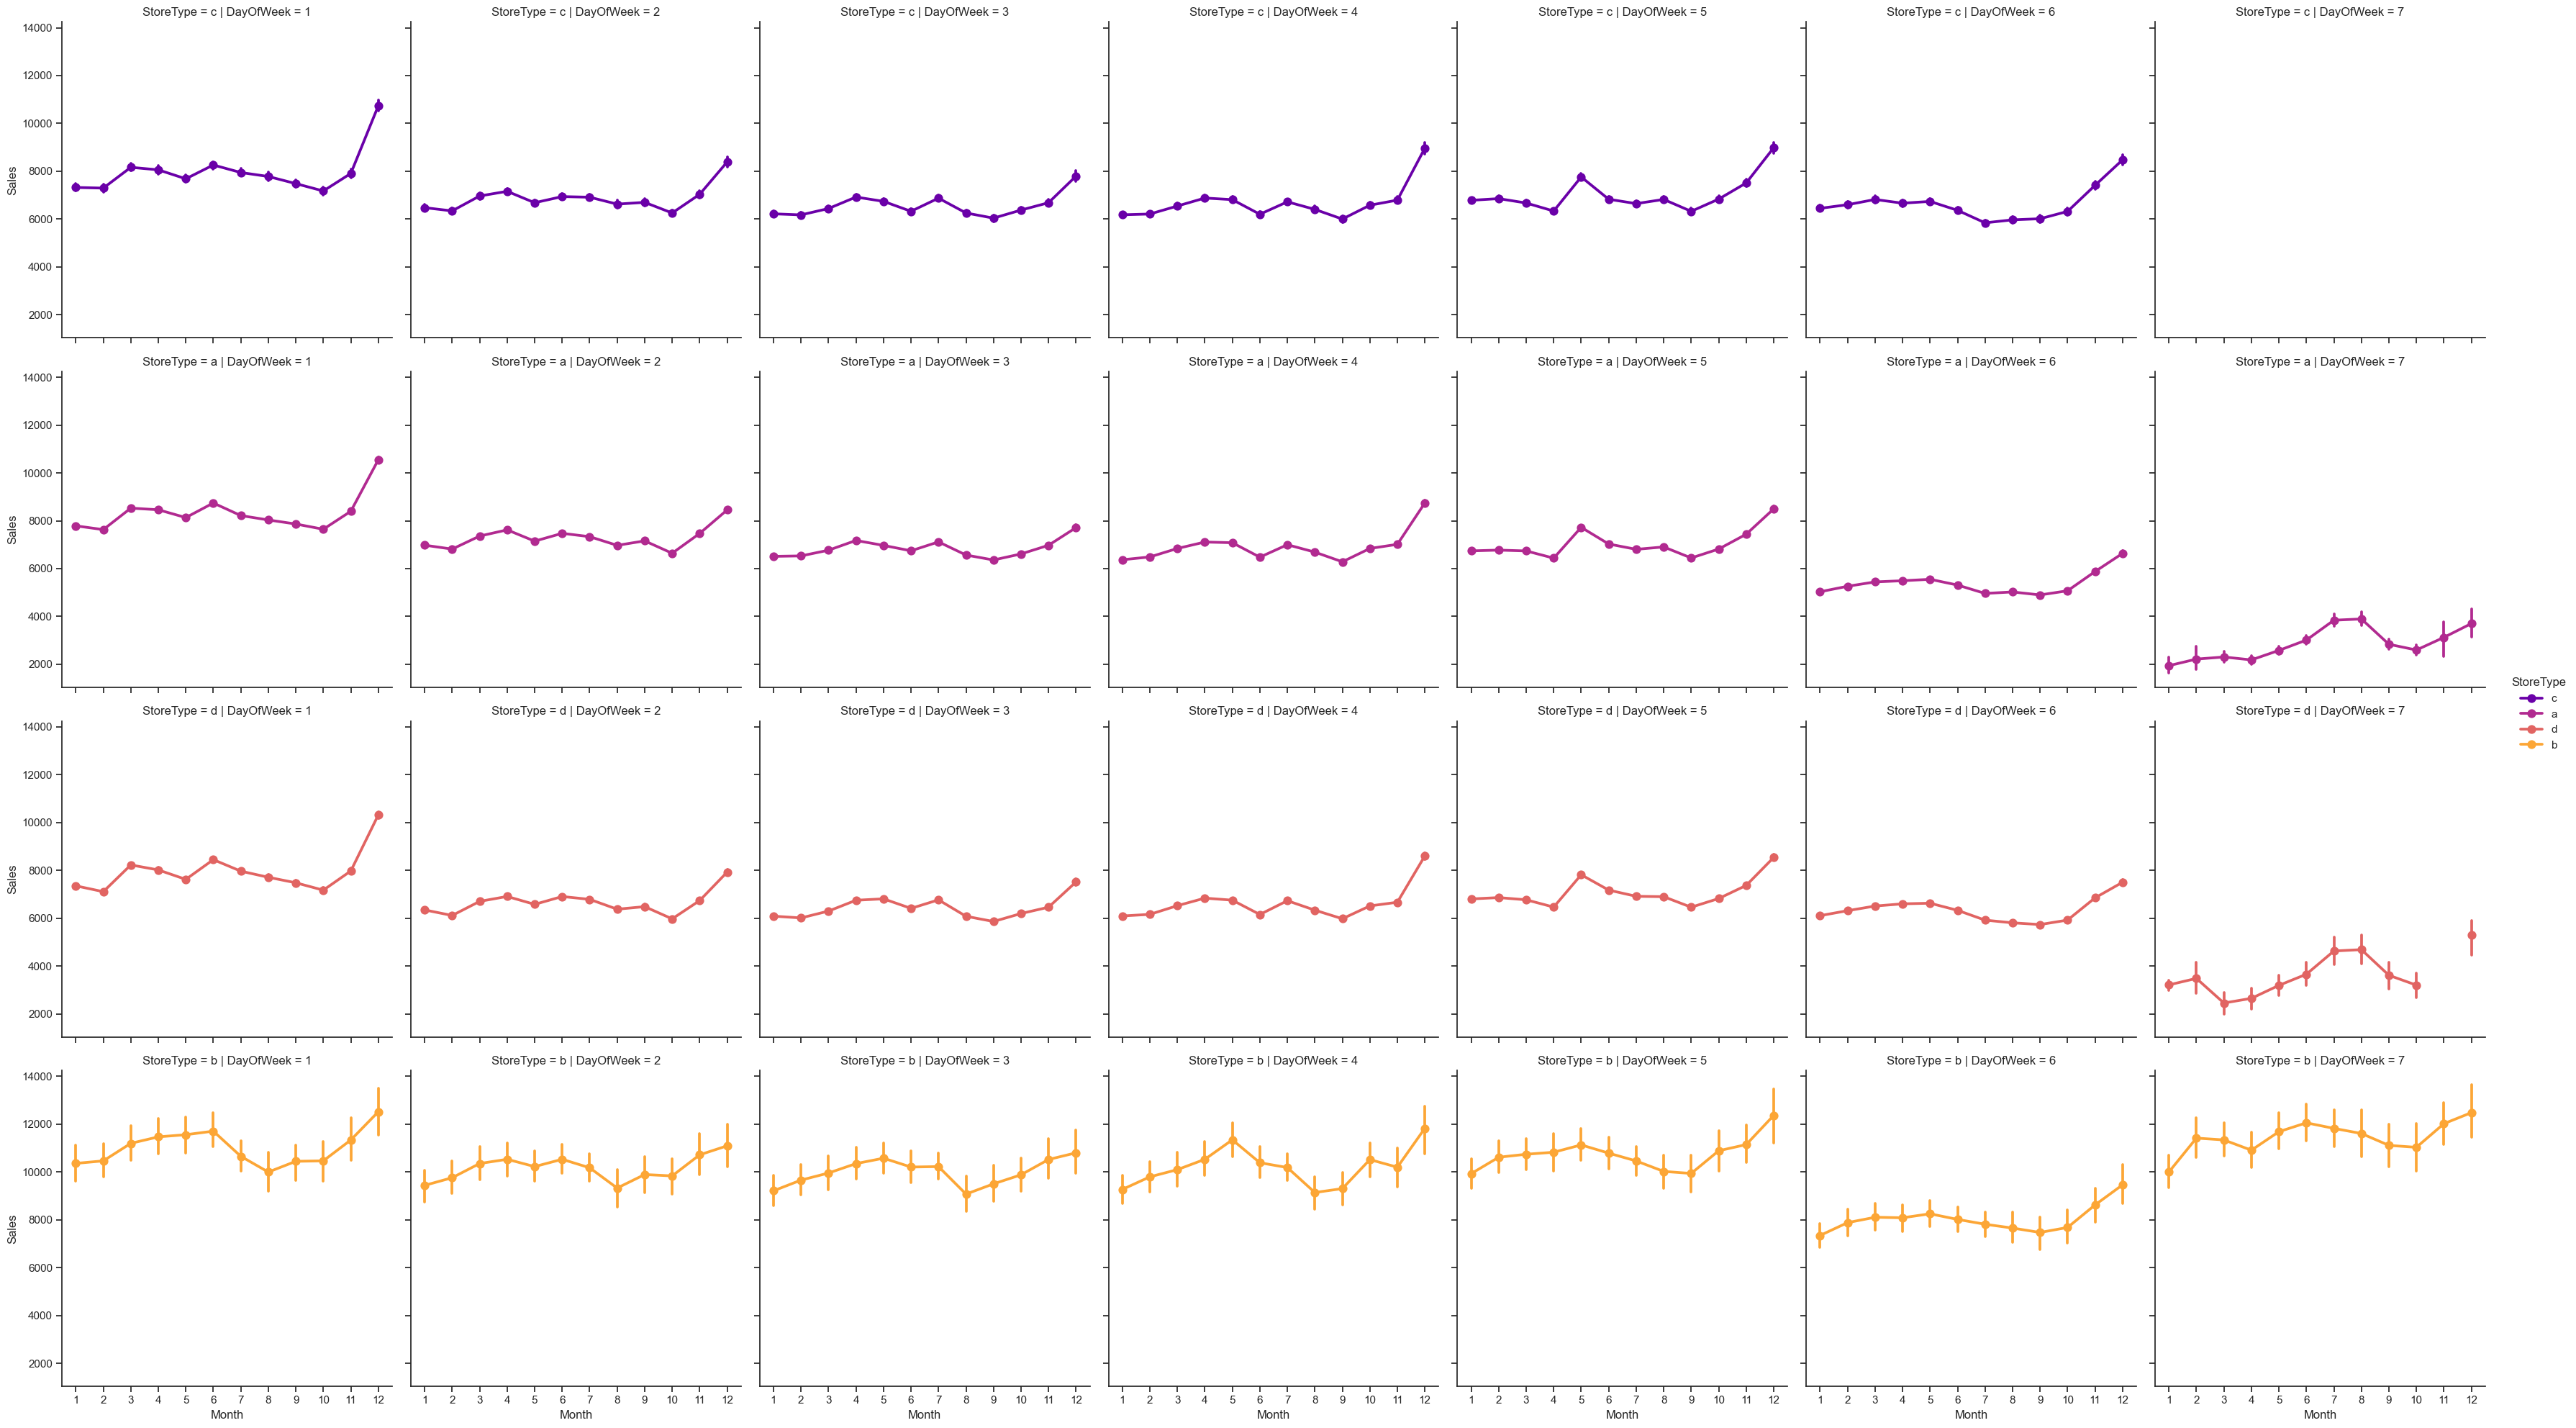

In [160]:
# customers
sns.catplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'DayOfWeek', 
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StoreType', 
               color = c,
               kind='point') 

In [161]:

train_store[(train_store.Open == 1) & (train_store.DayOfWeek == 7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  877,  931,  948, 1045, 1081, 1097, 1099],
      dtype=int64)

In [162]:
# competition open time (in months)
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)
    
# Promo open time
train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekOfYear - train_store.Promo2SinceWeek) / 4.0

# replace NA's by 0
train_store.fillna(0, inplace = True)

# average PromoOpen time and CompetitionOpen time per store type
train_store.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

,Sales,Customers,PromoOpen,CompetitionOpen
StoreType,,,,
a,6925.697986,795.422370,12918.492198,7115.514452
b,10233.380141,2022.211825,17199.328069,11364.495244
c,6933.126425,815.538073,12158.636107,6745.418694
d,6822.300064,606.353935,10421.916846,9028.526526


Correlational Analysis

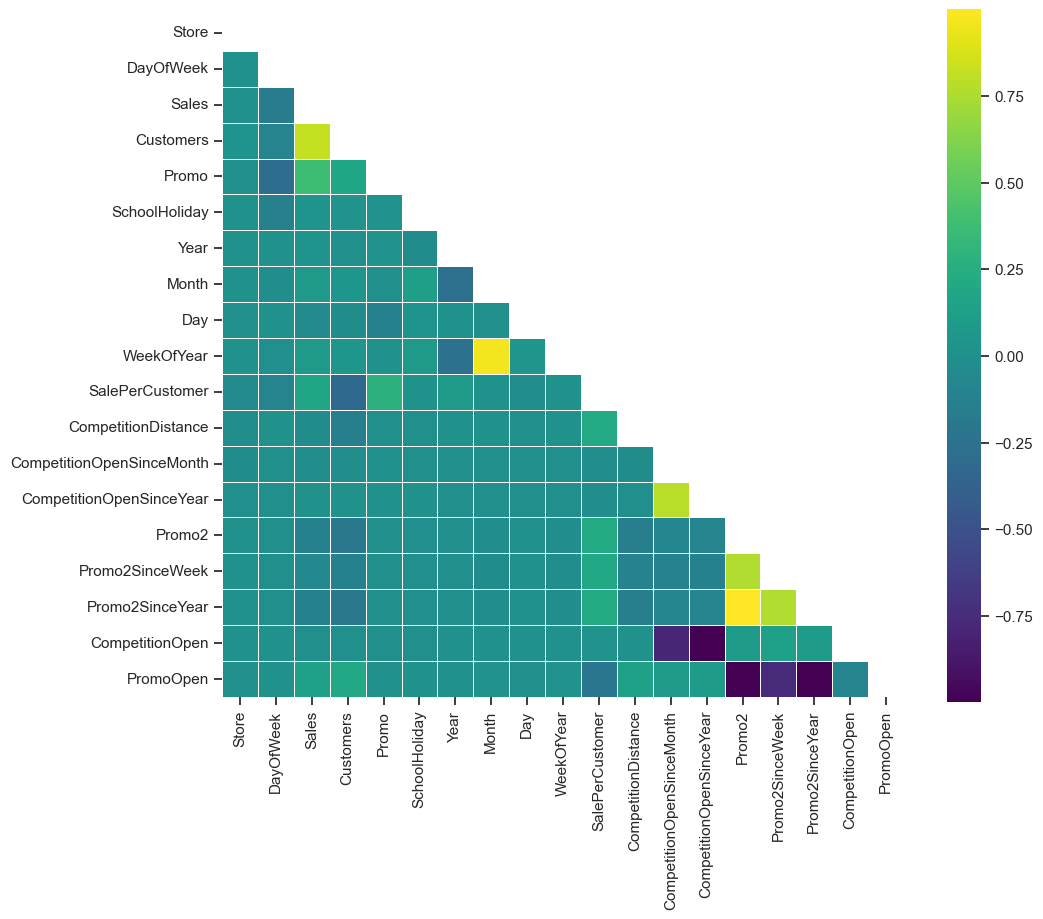

In [163]:
# Drop non-numeric columns from the DataFrame
numeric_columns = train_store.select_dtypes(include='number').columns
numeric_data = train_store[numeric_columns]

# Compute the correlation matrix excluding 'Open' variable
corr_all = numeric_data.drop('Open', axis=1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask=mask, square=True, linewidths=.5, ax=ax, cmap="viridis")

plt.show()

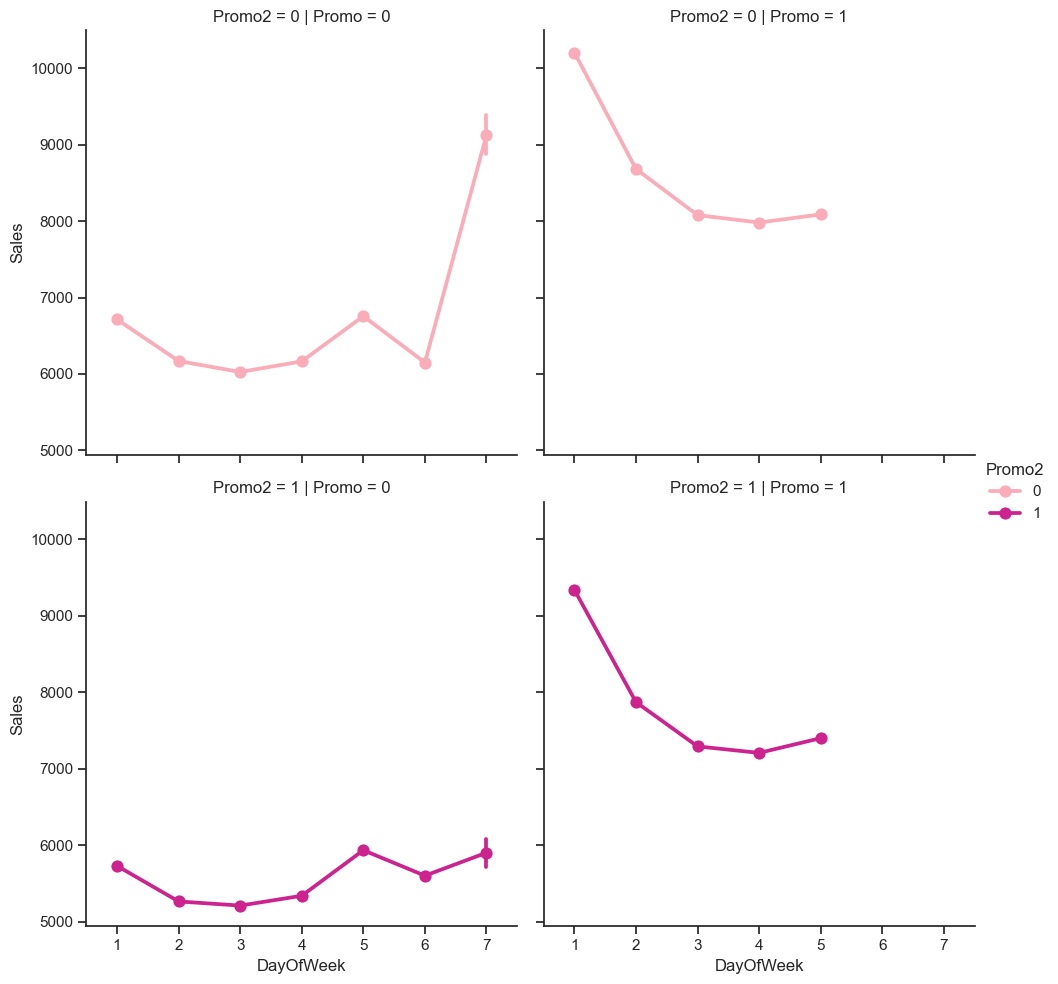

In [164]:


# Sử dụng catplot để vẽ các biểu đồ dạng point plot
sns.catplot(data=train_store, x='DayOfWeek', y='Sales',
            col='Promo', row='Promo2',
            hue='Promo2',
            palette='RdPu',
            kind='point',
            ax=ax)  # Chú ý sử dụng ax để vẽ vào hình đã tạo

# Hiển thị hình
plt.show()

Seasonality

<Axes: xlabel='Date'>

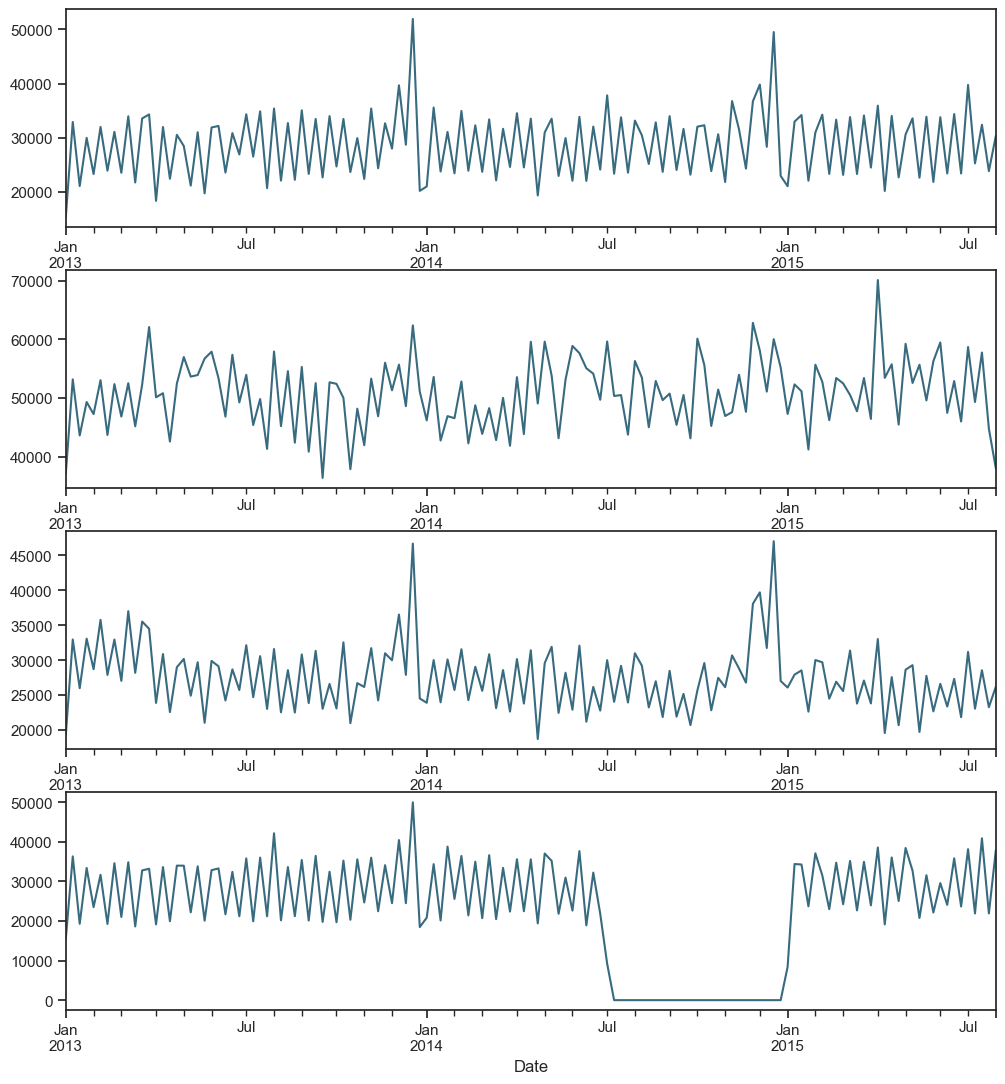

In [165]:
 # preparation: input should be float type
train['Sales'] = train['Sales'] * 1.0

# store types
sales_a = train[train.Store == 2]['Sales']
sales_b = train[train.Store == 85]['Sales'].sort_index(ascending = True) # solve the reverse order
sales_c = train[train.Store == 1]['Sales']
sales_d = train[train.Store == 13]['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# store types
sales_a.resample('W').sum().plot(color = c, ax = ax1)
sales_b.resample('W').sum().plot(color = c, ax = ax2)
sales_c.resample('W').sum().plot(color = c, ax = ax3)
sales_d.resample('W').sum().plot(color = c, ax = ax4)

Yearly trend

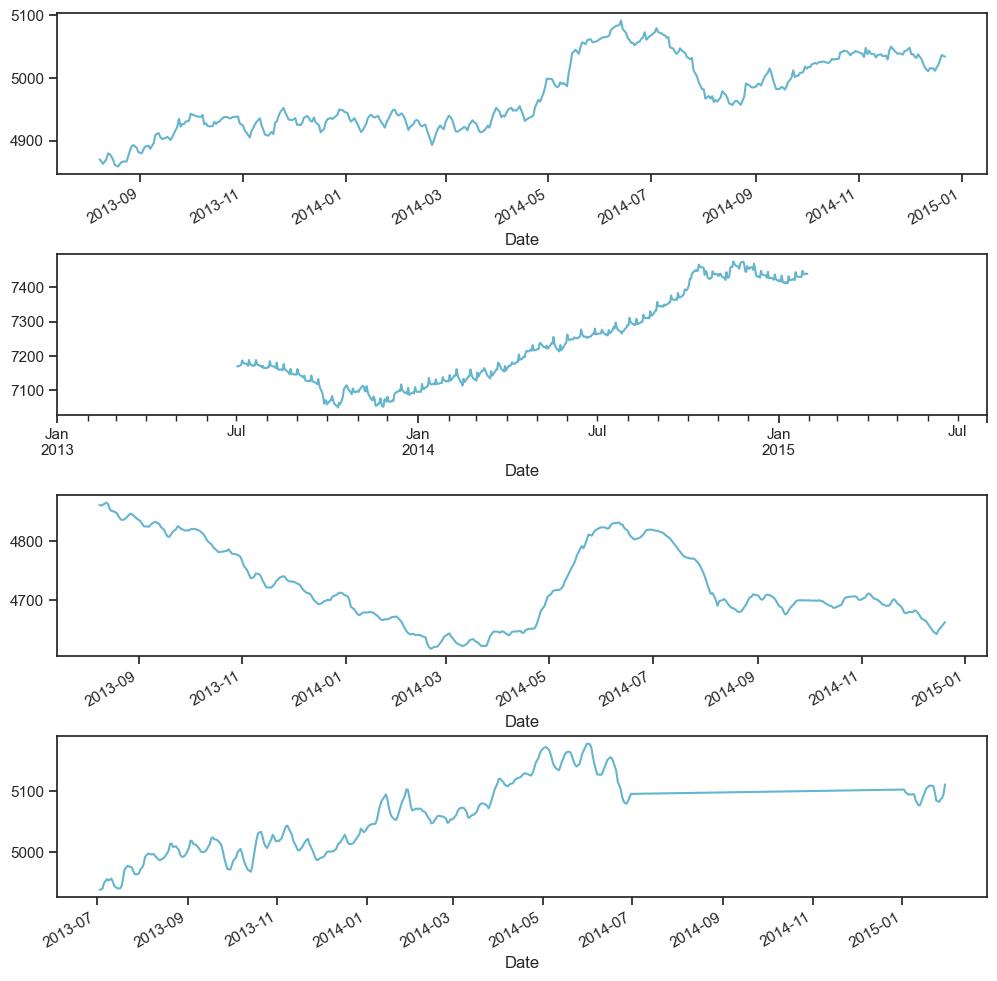

In [166]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Create subplots
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12, 13))

# Monthly
decomposition_a = seasonal_decompose(sales_a, model='additive', period=365)
decomposition_a.trend.plot(color='c', ax=ax1)
print('')
decomposition_b = seasonal_decompose(sales_b, model='additive', period=365)
decomposition_b.trend.plot(color='c', ax=ax2)
print('')
decomposition_c = seasonal_decompose(sales_c, model='additive', period=365)
decomposition_c.trend.plot(color='c', ax=ax3)
print('')
# Adjust the period for sales_d
decomposition_d = seasonal_decompose(sales_d, model='additive', period=300)
decomposition_d.trend.plot(color='c', ax=ax4)
print('')
plt.subplots_adjust(hspace=0.5)
# Show the plot
plt.show()


Mô hình

In [167]:
import pandas as pd

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [169]:
df = pd.read_csv("rossman_train.csv")

In [170]:
df_new = df.merge(store,on=["Store"], how="inner")

In [171]:
print(df_new.shape)

(1017209, 18)


In [172]:
print("Distinct number of Stores :", len(df_new["Store"].unique()))
print("Distinct number of Days :", len(df_new["Date"].unique()))
print("Average daily sales of all stores : ",round(df_new["Sales"].mean(),2))

Distinct number of Stores : 1115
Distinct number of Days : 942
Average daily sales of all stores :  5773.82


In [173]:
df_new['Date'] = pd.to_datetime(df_new['Date'], infer_datetime_format=True)
df_new["Month"] = df_new["Date"].dt.month
df_new["Quarter"] = df_new["Date"].dt.quarter
df_new["Year"] = df_new["Date"].dt.year
df_new["Day"] = df_new["Date"].dt.day
df_new["Week"] = df_new["Date"].dt.isocalendar().week
df_new["Season"] = np.where(df_new["Month"].isin([3,4,5]),"Spring",np.where(df_new["Month"].isin([6,7,8]),"Summer",np.where(df_new["Month"].isin([9,10,11]),"Fall",np.where(df_new["Month"].isin([12,1,2]),"Winter","None"))))
print(df_new[["Date","Year","Month","Day","Week","Quarter","Season"]].head())

        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


In [174]:
df_new["CompetitionDistance"]=df_new["CompetitionDistance"].fillna(df_new["CompetitionDistance"].mode()[0])

In [175]:
target = ["Sales"]

In [176]:
numeric_columns = ["Customers","Open","Promo","Promo2","StateHoliday","SchoolHoliday",
                   "CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year",
                       "StoreType","Assortment","Season"]

In [177]:
#Define a function that will intake the raw dataframe
def create_ohe(df, col):
    le = LabelEncoder()
    a=le.fit_transform(df_new[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

In [178]:
#Since the above function converts the column, one at a time
#We create a loop to create the final dataset with all features
temp = df_new[numeric_columns]
for column in categorical_columns:
    temp_df = create_ohe(df_new,column)
    temp = pd.concat([temp,temp_df],axis=1)
temp["StateHoliday"]= np.where(temp["StateHoliday"]== '0',0,1)

In [179]:
x_train, x_test, y_train, y_test = train_test_split(temp,df_new[target],test_size=0.2,random_state=2018)

In [180]:
#Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.1,random_state=2018)

In [181]:
#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (732390, 44)
Shape of x_val: (81377, 44)
Shape of x_test: (203442, 44)
Shape of y_train: (732390, 1)
Shape of y_val: (81377, 1)
Shape of y_test: (203442, 1)


In [182]:
#calculate the average score of the train dataset
mean_sales = y_train.mean()
print("Average Sales :",mean_sales)

Average Sales : Sales    5773.099997
dtype: float64


In [183]:
#Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data:",abs(y_test - mean_sales).mean()[0])

MAE for Test Data: 2883.587604303127


In [184]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [185]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))

model.add(Dense(1,activation = "linear"))

In [186]:
#Configure the model
model.compile(optimizer='adam',loss="mean_absolute_error", metrics=["mean_absolute_error"])

In [187]:
#Train the model
model.fit(x_train.values,y_train.values, validation_data=(x_val,y_val),epochs=10,batch_size=64)

Epoch 1/10
11444/11444 [==============================] - 16s 1ms/step - loss: 942.4679 - mean_absolute_error: 942.4679 - val_loss: 835.3059 - val_mean_absolute_error: 835.3059
Epoch 2/10
11444/11444 [==============================] - 17s 1ms/step - loss: 777.8018 - mean_absolute_error: 777.8018 - val_loss: 752.1940 - val_mean_absolute_error: 752.1940
Epoch 3/10
11444/11444 [==============================] - 16s 1ms/step - loss: 738.3942 - mean_absolute_error: 738.3942 - val_loss: 746.6260 - val_mean_absolute_error: 746.6260
Epoch 4/10
11444/11444 [==============================] - 14s 1ms/step - loss: 720.8066 - mean_absolute_error: 720.8066 - val_loss: 708.2581 - val_mean_absolute_error: 708.2581
Epoch 5/10
11444/11444 [==============================] - 14s 1ms/step - loss: 711.8231 - mean_absolute_error: 711.8231 - val_loss: 698.5048 - val_mean_absolute_error: 698.5048
Epoch 6/10
11444/11444 [==============================] - 17s 1ms/step - loss: 703.8121 - mean_absolute_error: 703.

In [188]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(x_test.values,y_test.values)

#Print the results
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

6358/6358 [==============================] - 7s 1ms/step - loss: 678.5734 - mean_absolute_error: 678.5734
Metric  loss : 678.57
Metric  mean_absolute_error : 678.57


In [189]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
history = model.fit(x_train,y_train, validation_data=(x_val,
y_val),epochs=10,batch_size=64)
#result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/10
11444/11444 [==============================] - 25s 2ms/step - loss: 1738017.7500 - mean_absolute_error: 853.5983 - val_loss: 1244350.2500 - val_mean_absolute_error: 747.8267
Epoch 2/10
11444/11444 [==============================] - 22s 2ms/step - loss: 1159331.2500 - mean_absolute_error: 723.5240 - val_loss: 1006293.9375 - val_mean_absolute_error: 679.3372
Epoch 3/10
11444/11444 [==============================] - 18s 2ms/step - loss: 1086586.0000 - mean_absolute_error: 699.4644 - val_loss: 1043038.6875 - val_mean_absolute_error: 695.5517
Epoch 4/10
11444/11444 [==============================] - 18s 2ms/step - loss: 1055675.6250 - mean_absolute_error: 689.3719 - val_loss: 1009528.3750 - val_mean_absolute_error: 679.4606
Epoch 5/10
11444/11444 [==============================] - 19s 2ms/step - loss: 1032083.5625 - mean_absolute_error: 681.5200 - val_loss: 997655.8750 - val_mean_absolute_error: 689.4583
Epoch 6/10
11444/11444 [==============================] - 19s 2ms/step - los

In [190]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val),
epochs=15,batch_size=64)
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/15
11444/11444 [==============================] - 35s 3ms/step - loss: 1726919.3750 - mean_absolute_error: 857.2445 - val_loss: 1189833.8750 - val_mean_absolute_error: 748.7613
Epoch 2/15
11444/11444 [==============================] - 29s 2ms/step - loss: 1165903.3750 - mean_absolute_error: 723.3085 - val_loss: 1485649.7500 - val_mean_absolute_error: 822.9960
Epoch 3/15
11444/11444 [==============================] - 32s 3ms/step - loss: 1089465.3750 - mean_absolute_error: 698.2313 - val_loss: 1112049.5000 - val_mean_absolute_error: 725.7078
Epoch 4/15
11444/11444 [==============================] - 27s 2ms/step - loss: 1061488.5000 - mean_absolute_error: 689.3604 - val_loss: 998056.0625 - val_mean_absolute_error: 666.8113
Epoch 5/15
11444/11444 [==============================] - 30s 3ms/step - loss: 1033142.0000 - mean_absolute_error: 680.9451 - val_loss: 1146712.7500 - val_mean_absolute_error: 749.6987
Epoch 6/15
11444/11444 [==============================] - 30s 3ms/step - los

In [191]:
model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val),
epochs=15,batch_size=64)
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/15
11444/11444 [==============================] - 28s 2ms/step - loss: 1680054.2500 - mean_absolute_error: 848.5041 - val_loss: 1120241.6250 - val_mean_absolute_error: 712.2271
Epoch 2/15
11444/11444 [==============================] - 28s 2ms/step - loss: 1149779.7500 - mean_absolute_error: 721.8192 - val_loss: 1042733.6875 - val_mean_absolute_error: 700.7102
Epoch 3/15
11444/11444 [==============================] - 27s 2ms/step - loss: 1084753.5000 - mean_absolute_error: 700.6099 - val_loss: 1096467.7500 - val_mean_absolute_error: 714.0586
Epoch 4/15
11444/11444 [==============================] - 27s 2ms/step - loss: 1050369.7500 - mean_absolute_error: 687.9506 - val_loss: 1005050.3750 - val_mean_absolute_error: 681.9182
Epoch 5/15
11444/11444 [==============================] - 28s 2ms/step - loss: 1025112.9375 - mean_absolute_error: 679.4963 - val_loss: 954650.9375 - val_mean_absolute_error: 660.6367
Epoch 6/15
11444/11444 [==============================] - 27s 2ms/step - los

In [192]:
print(history.history['loss'], "Loss")
print(history.history['val_loss'],"VAL_loss")

[1738017.75, 1159331.25, 1086586.0, 1055675.625, 1032083.5625, 1011496.3125, 988630.0625, 970438.4375, 943932.625, 929955.3125] Loss
[1244350.25, 1006293.9375, 1043038.6875, 1009528.375, 997655.875, 955915.125, 953592.4375, 896973.5, 886211.5625, 909782.5] VAL_loss


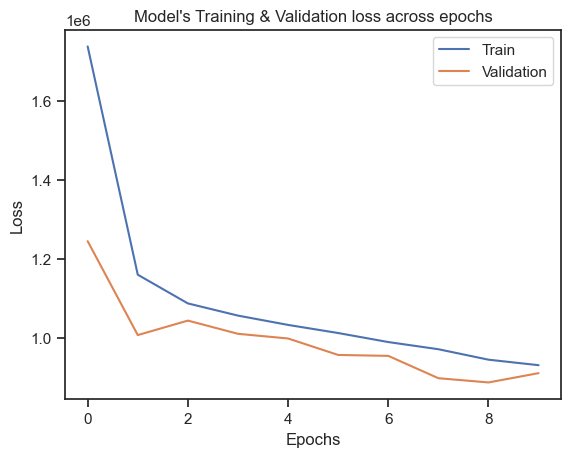

In [193]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [194]:
#Manually predicting from the model, instead of using model's evaluate function
y_test["Prediction"] = model.predict(x_test)
y_test.columns = ["Actual Sales","Predicted Sales"]
print(y_test.head(5))

6358/6358 [==============================] - 6s 979us/step
        Actual Sales  Predicted Sales
115563             0         0.238694
832654             0         0.238694
769112          2933      3157.089111
350588          8602      7483.863281
141556          6975      6402.776367


In [195]:
#Manually predicting from the model, instead of using model's evaluate function
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE :",mean_squared_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))
print("MAE :",mean_absolute_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))

MSE : 882589.7577124434
MAE : 637.6140007295365
